# CE 5362 Lesson 10 Unsteady Open Channel Flow
---

Refining the Lax-Scheme to generalize and explore some different examples.

## Finite-Difference Method for Unsteady Open Channel Flow

 The simplest form of solution that is conditionally stable and reasonably straightforward to program is called the Lax-Diffusion scheme.  Recall our difference equations derived from continunity:

\begin{equation}
\begin{matrix}
y_i^{t+\Delta t} = \frac{1}{2}(y_{i-1}^t+y_{i+1}^t) -\frac{r}{2}(\frac{A}{B}\vert_{i-1}^t + \frac{A}{B}\vert_{i+1}^t)(V_{i+1}^{t}-V_{i-1}^t)-\frac{r}{2}(V_{f,i-1}^t + V_{f,i+1}^t)(y_{i+1}^{t}-y_{i-1}^t) \\
~\\
 \end{matrix}
 \label{eqn:lax-continunity}
\end{equation}


and momentum:

\begin{equation}
\begin{matrix}
V_i^{t+\Delta t}=\frac{1}{2}(V_{i-1}^t+V_{i+1}^t) +
\Delta t  g(S_0-\frac{1}{2}(S_{f,i-1}^t + S_{f,i+1}^t))
- \frac{r}{2}(V_{i-1}^t+V_{i+1}^t) (V_{i+1}^{t}-V_{i-1}^t)
-rg(y_{i+1}^{t}-y_{i-1}^t)\\
~\\
\end{matrix}
\label{eqn:lax-momentum}
\end{equation}

## Example Transient Flow in Sudden Channel Closure
Now lets modify our script to consider the following example problem:
- Flow in a 1000-m long trapezoidal channel with a bottom width of 20-m, side slopeof 2H:1V, 
- Longitudinal slope $S_0$=0.0001,
- Manning’s resistance n=0.013.  
- Initial discharge in the channel is 110 $\frac{m^3}{s}$ 
- Initial flow depth is 3.069 m.  

Simulate theflow  and  depth  at  every  100-m  station  when  a  downstream  gate  is  closed  at  t=0.

Produce a graph of depth and velocity versus location for t=0, 60, 360 seconds.

This example is derived from Hydraulic Engineering Roberson, J. A., Cassidy, J.J.,and Chaudry, M. H., (1988) Hydraulic Engineering, Houghton Mifflin Co.  It is iden-tical to the example in that book starting on page 623. (Chapter 12 on the server copy)

Celerity =  4.938
Delta x  =  100.0
Delta t  =  15.85
ITmax =  23
__________
Time =  0.0  seconds. Time step length =  15.850313562235069  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 1.371
1 3.069 1.371
2 3.069 1.371
3 3.069 1.371
4 3.069 1.371
5 3.069 1.371
6 3.069 1.371
7 3.069 1.371
8 3.069 1.371
9 3.069 1.371
10 3.069 1.371


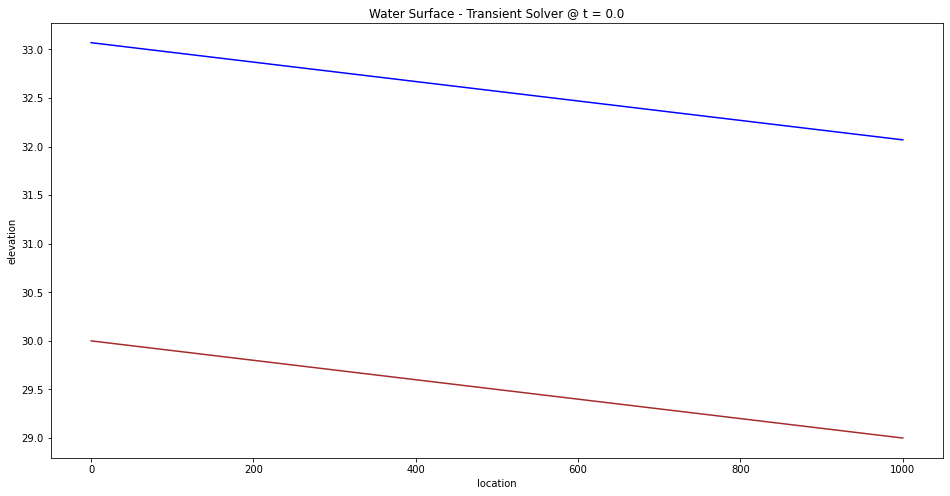

ddn  3.069
ddn2  3.069
__________
Time =  60.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 1.882
1 3.069 1.882
2 3.069 1.882
3 3.069 1.882
4 3.069 1.882
5 3.069 1.882
6 3.069 1.882
7 3.475 1.114
8 3.628 0.833
9 3.967 0.239
10 4.094 0.0


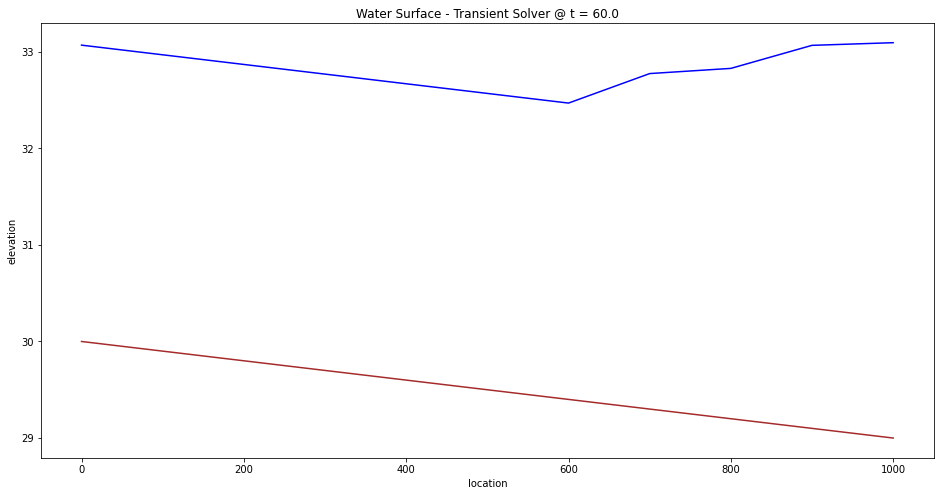

ddn  4.094434772388679
ddn2  3.966926376525995
__________
Time =  120.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 2.338
1 3.069 2.338
2 3.069 2.338
3 3.187 2.113
4 3.241 2.01
5 3.58 1.39
6 3.728 1.126
7 4.027 0.622
8 4.164 0.392
9 4.311 0.17
10 4.412 0.0


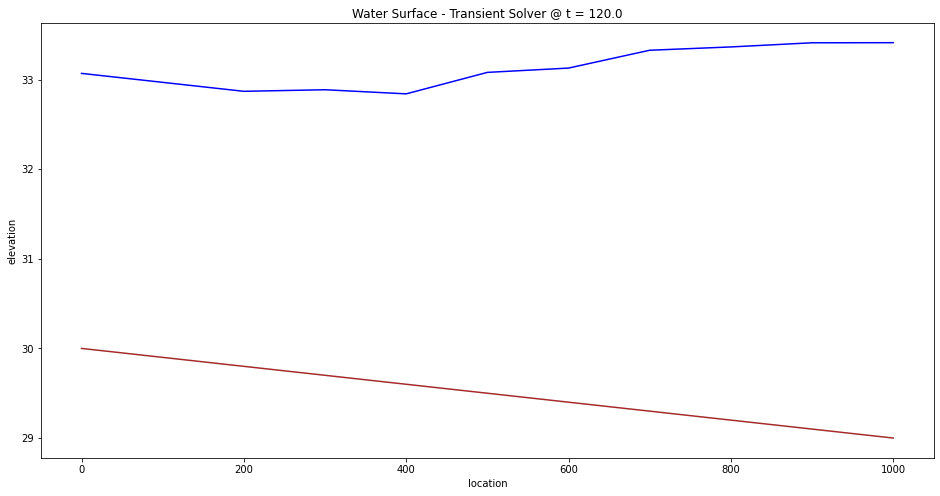

ddn  4.411604649973868
ddn2  4.310518650071867
__________
Time =  180.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 2.519
1 3.192 2.281
2 3.315 2.271
3 3.62 1.727
4 3.771 1.464
5 4.065 0.982
6 4.213 0.74
7 4.384 0.491
8 4.498 0.313
9 4.619 0.151
10 4.715 0.0


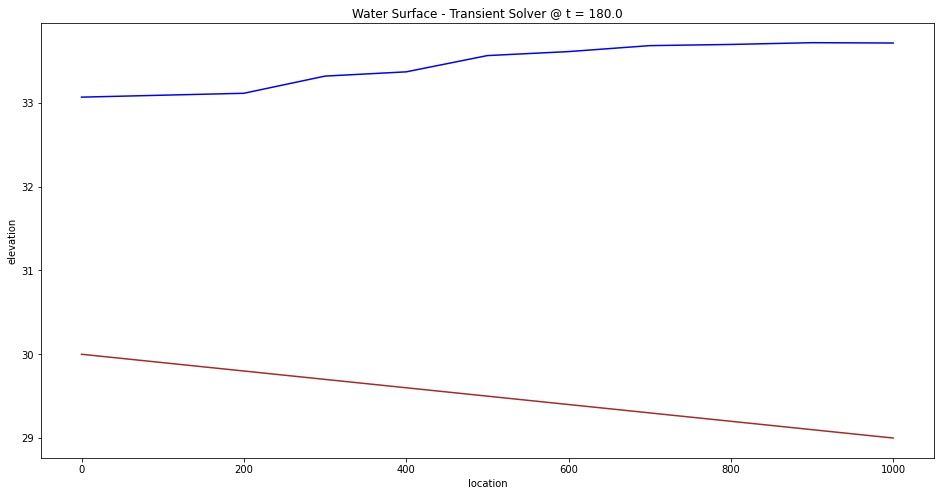

ddn  4.715302135038655
ddn2  4.61907130581579
__________
Time =  240.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 1.684
1 3.301 1.337
2 3.592 1.445
3 3.889 0.982
4 4.167 0.958
5 4.363 0.683
6 4.553 0.604
7 4.69 0.432
8 4.797 0.279
9 4.915 0.137
10 5.009 0.0


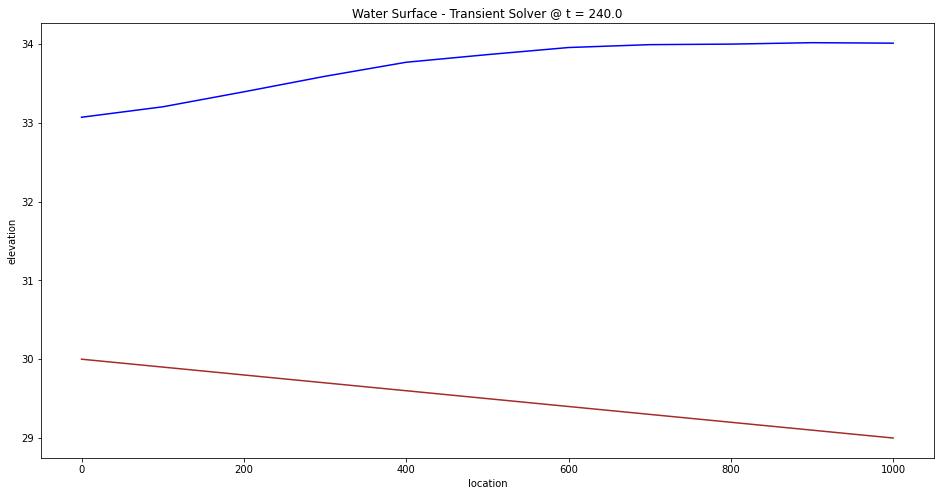

ddn  5.008759836889632
ddn2  4.9148248995344925
__________
Time =  300.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 0.258
1 3.341 0.07
2 3.668 0.259
3 3.907 0.055
4 4.218 0.216
5 4.388 0.076
6 4.659 0.206
7 4.796 0.081
8 5.017 0.148
9 5.138 0.028
10 5.289 0.0


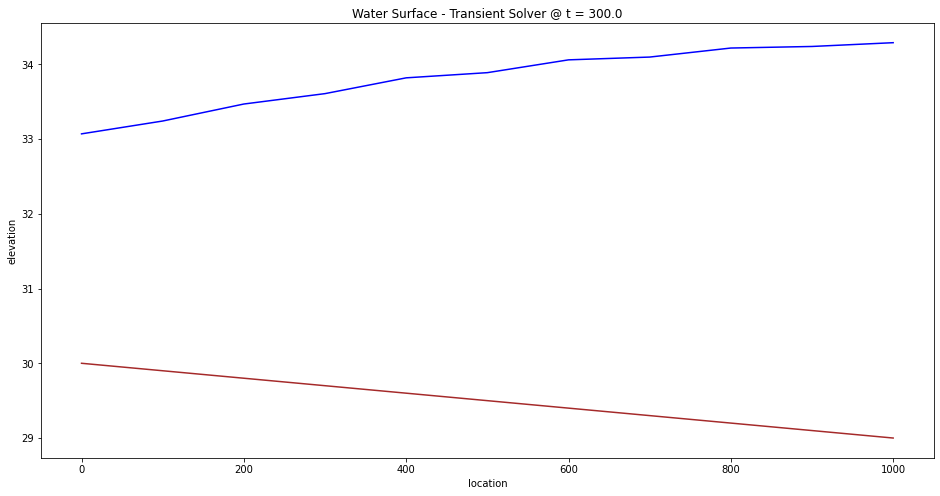

ddn  5.288524740440472
ddn2  5.137958731720373
__________
Time =  330.0  seconds. Time step length =  15.0  seconds 
IROW   DEPTH   VELOCITY 
0 3.069 -0.886
1 3.349 -0.651
2 3.601 -0.705
3 3.898 -0.499
4 4.097 -0.549
5 4.385 -0.347
6 4.551 -0.414
7 4.822 -0.233
8 4.907 -0.227
9 5.148 -0.083
10 5.146 0.0


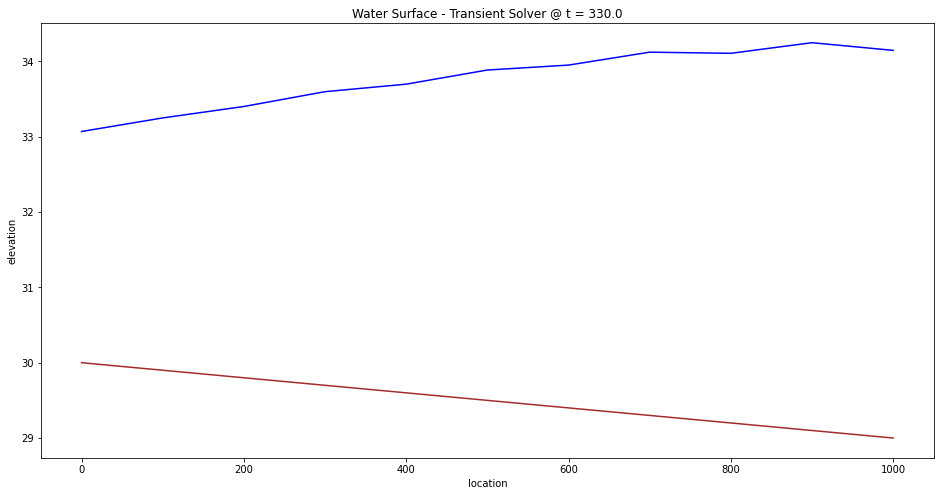

ddn  5.145916850880375
ddn2  5.148033705164686


In [50]:
import math # python package for various common math functions
import matplotlib # python plotting package

########## prototype hydraulic functions #####################
# hydraulic functions for trapezoidal channels
# depth == flow depth          
# bottom == bottom width of trapezoidal channel
# side == side slope (same value both sides) of trapezoidal channel
# computed values:
# bt == computed topwidth :: ar == flow area, used in fd update :: wp == wetted perimeter, used in fd update

def bt(depth,bottom,side):   # depth-topwidth function
    topwidth = (bottom + 2.0*side*depth);
    return(topwidth);

def ar(depth,bottom,side):  # depth area function
    area = (depth*(bottom+side*depth));
    return(area)

def wp(depth,bottom,side):   # depth perimeter
    import math
    perimeter = (bottom+2.0*depth*math.sqrt(1.0+side*side));
    return(perimeter)

######### prototype display functions #########################

def writenow(t,dt,y,v,b0,s): # printing functions
    print("__________")
    print("Time = ",t," seconds.","Time step length = ",dt," seconds ")
    print("IROW "," DEPTH "," VELOCITY ")
    for irow in range(0,len(v)):
        print(irow,round(y[irow],3),round(v[irow],3))
    return()  #observe a NULL return, this function messages to the output device, so there is nothing to return.

def plot2lines(list1,list2,list3,list4,strx,stry,strtitle): # plot list1 on x, list2 on y, xlabel, ylabel, title
    from matplotlib import pyplot as plt # import the plotting library from matplotlibplt.show()
    myfigure = matplotlib.pyplot.figure(figsize = (16,8))
    plt.plot( list1, list2, color ='brown', marker ='', linestyle ='solid') # create a line chart, years on x-axis, gdp on y-axis
    plt.plot( list3, list4, color ='blue', marker ='', linestyle ='solid') # create a line chart, years on x-axis, gdp on y-axis
    plt.title(strtitle)# add a title
    plt.ylabel(stry)# add a label to the x and y-axes
    plt.xlabel(strx)
    plt.show() # display the plot
    return #null return
####################
####################
####################
###### Problem Constants and Input Block #######
# simulation domain
l = 1000.0 # total length (the length of computational domain)
n = 10 # number of reaches
# physical constants
g = 9.81 # gravitational acceleration, obviously SI units

q0 = 110.0 # initial discharge
yd = 3.069 # initial flow depth in the model
yu = 3.069 # upstream constant depth
mn = 0.013 # Manning's n
s0 = 0.001 # longitudinal slope (along direction of flow)
#####################################
#####################################
#####################################
tmax = 360 # total simulation time in seconds (one day in this case)
iprt =  4 # print every iprt time steps (make big to suppress output)
#####################################
#####################################
#####################################
nn = n+1 # how many nodes, will jack with boundaries later
mn2 = mn*mn # Manning's n squared, will appear a lot.
######## Here we build storage vectors ###############
bw = [0]*nn # bottom width vector 
ss = [0]*nn # side slope vector
#### Geometry
bw = [20,20,20,20,20,20,20,20,20,20,20]
ss = [2,2,2,2,2,2,2,2,2,2,2]
#### Initial Velocity 
a = ar(yd,bw[n],ss[n]) # flow area at beginning of time
v0 = q0/a # initial velocity
#### depth and velocity vectors
y = [0]*nn # create nn elements of vector y, all zero
yp = [0]*nn # updates go in this vector, same length as y
v = [0]*nn # create nn elements of vector v
vp = [0]*nn # updates go in this vector, same length and v
ytmp = [0]*nn
vtmp = [0]*nn
y = [float(yd) for i in y] # populate y with nn things, each thing has value yd
v = [float(v0) for i in y] # populate v with nn things, each thing has value v0
### Build the output geometry
b = bt(y[n],bw[n],ss[n]) # topwidth at downstream end
c = math.sqrt(g*a/b) # celerity at initial conditions
dx = l/n # delta x, length of a reach
xx = [dx*(i) for i in range(0,nn)] # Spatial locations of nodes, used for plotting
bse = [30 - s0*xx[i] for i in range(0,nn)] # bottom channel elevation
wse = [bse[i]+y[i] for i in range(0,nn)] # water surface elevation
dt = dx/(v0 + c) # the time step that satisfies the courant condtions
kmax = round(tmax/dt)  # set maximum number of time steps
print('Celerity = ',round(c,3) )
print('Delta x  = ',round(dx,3))
print('Delta t  = ',round(dt,3))
print("ITmax = ",(kmax))
#####################################
#####################################
#####################################
k = 0 # time counter
t = 0.0 # elapsed time
writenow(t,dt,y,v,bw[0],ss[0])
for i in range(0,nn):
    wse[i]=bse[i]+y[i]
plot2lines(xx,bse,xx,wse,"location","elevation","Water Surface - Transient Solver @ t = "+str(t))
print('ddn ', y[n])
print('ddn2 ',y[n-1])
#plot2lines(xx,y,xx,v,"location","depth (brown), velocity (blue) ","Depth and Velocity - Transient Solver")
for itime in range(0,kmax): # begin time stepping loop scope
#print('Iteration Count = ',itime)
######## Adaptive Time Step Based on Current mesh courant number ###
    bestdt = dt # start with current time step
### begin courant number each cell loop scope
    for i in range(0,nn):
        a = ar(y[i],bw[i],ss[i]);
        b = bt(y[i],bw[i],ss[i]);
        c = math.sqrt(g*a/b);
        dtn = dx/abs((v[i])+c)
    # now test
        if(dtn < bestdt):
            bestdt = dtn
### end courant number each cell loop scope
    dt = bestdt
    dt = 15.0
    #####################################
    #####################################
    #####################################
#print('time-step length = ',dt)
#writenow(t,dt,y,v,b0,s)

#manual fixed dt



    #print(v[n],vp[n])
###### Finite Difference #################################
    r = 0.5*dt/dx;
###### LEFT BOUNDARY #####################################
# UPSTREAM FIXED STAGE AT PRESCRIBED NORMAL DEPTH        #
##########################################################
    yp[0] = yu
    ab = ar(y[1],bw[1],ss[1]);
    bb = bt(y[1],bw[1],ss[1]);
    cb = math.sqrt(g*bb/ab);
    rb = ab/wp(y[1],bw[1],ss[1]);
    sfb = (mn2*v[1]*v[1])/(rb**(1.333));
    cn = v[1] -cb*y[1]+ g*(s0-sfb)*dt;
    vp[0] = cn + cb*yp[0];
###### RIGHT BOUNDARY ####################################
#         FIXED STAGE AT DOWNSTREAM END                  #
##########################################################
# fixed stage boundary, find velocity along a characteristic
#    yp[n-1] = yd ;
#    aa = ar(y[n-1],bw[n-1],ss[n-1]);
#    ba = bt(y[n-1],bw[n-1],ss[n-1]);
#    ca = math.sqrt(g*ba/aa);
#    ra = aa/wp(y[n-1],bw[n-1],ss[n-1]);
#    sfa = (mn2*v[n-1]*v[n-1])/(ra**(4.0/3.0));
#    cp = v[n-1] + ca*y[n-1]+g*(s0-sfa)*dt;
##yp[nn] <<- (cp - vp[nn])/ca;
#    vp[n] = cp - yp[n]*ca 

###### RIGHT BOUNDARY ####################################
# REFLECTION BOUNDARY AT DOWNSTREAM END                  #
##########################################################
# reflection boundary, find depth along a characteristic
    vp[n] = 0. ;
    aa = ar(y[n-1],bw[n-1],ss[n-1]);
    ba = bt(y[n-1],bw[n-1],ss[n-1]);
    ca = math.sqrt(g*ba/aa);
    ra = aa/wp(y[n-1],bw[n-1],ss[n-1]);
    sfa = (mn2*v[n-1]*v[n-1])/(ra**(4.0/3.0));
    cp = v[n-1] + ca*y[n-1]+g*(s0-sfa)*dt;
    yp[n] = (cp - vp[n])/ca;
######## INTERIOR NODES AND REACHES ###############
### loop through the interior nodes
    for i in range(1,n): # begin interior node loop scope
        aa = ar(y[i-1],bw[i-1],ss[i-1]);
        ba = bt(y[i-1],bw[i-1],ss[i-1]);
        pa = wp(y[i-1],bw[i-1],ss[i-1]);
        ra = aa/pa;
        sfa = (mn2*v[i-1]*v[i-1])/(ra**(4.0/3.0));
        ab = ar(y[i+1],bw[i+1],ss[i+1]);
        bb = bt(y[i+1],bw[i+1],ss[i+1]);
        pb = wp(y[i+1],bw[i+1],ss[i+1]);
        rb = ab/pb;
        sfb = (mn2*v[i+1]*v[i+1])/(rb**(4.0/3.0));
# need averages of sf, hydraulic depth
        dm = 0.5*(aa/ba + ab/bb);
        sfm = 0.5*(sfa+sfb);
        vm = 0.5*(v[i-1]+v[i+1]);
        ym = 0.5*(y[i-1]+y[i+1]);
# new momentum
        vp[i] = vm -r*g*(y[i+1] - y[i-1]) -r*vm*(v[i+1] - v[i-1]) + g*dt*(s0-sfm);
# new depth
        yp[i] = ym - r*dm*(v[i+1] - v[i-1]) -r*vm*(y[i+1] - y[i-1]);
### end of interior node loop scope
# update time, count, depth and momentum
    t = t+dt; # Increment simulation time
    k = k+1; # Increment loop counter
    for i in range(0,n+1):
        v[i]=vp[i]
        y[i]=yp[i]
    if (k%iprt == 0): # Write current conditions every iprt time steps
        writenow(t,dt,y,v,bw[0],ss[0])
        for i in range(0,nn):
            wse[i]=bse[i]+y[i]
        plot2lines(xx,bse,xx,wse,"location","elevation","Water Surface - Transient Solver @ t = "+str(t))
        print('ddn ', y[n])
        print('ddn2 ',y[n-1])
#        plot2lines(xx,y,xx,v,"location","depth (brown), velocity (blue) ","Depth and Velocity - Transient Solver")
##    dt = 2*dt #artificially inflate the time step to force adaptive update
    #print(v[n],vp[n])
# end time step loop

# provisional code to make a plot
writenow(t-dt,dt,y,v,bw[0],ss[0])
for i in range(0,nn):
    wse[i]=bse[i]+y[i]
plot2lines(xx,bse,xx,wse,"location","elevation","Water Surface - Transient Solver @ t = "+str(t-dt))
print('ddn ', y[n])
print('ddn2 ',y[n-1])
# plot2lines(xx,y,xx,v,"location","depth (brown), velocity (blue) ","Depth and Velocity - Transient Solver")

# Same Case in SWMM

In SWMM we can model the same case, but the boundary conditions are problematic. 

If we observe (and simulate) that if there were one additional reach (conduit) that starts out life as an open conduit then at some portion of time becomes closed, we can approximate the case of the above script.

The upstream reservoir takes some noodling - we will create a storage element with a huge pool area, so that it will take an enernity to drain, thus mimicing the situation that is relitavely easy to invoke above. 

For this lesson I have already prepared a SWMM model to save us the time of the more tedious data entry.

## Example Transient Flow with Upstream Input Hydrograph on a Zero-Slope Channel
Now lets modify our script to consider the following example problem:
- Flow in a 29000-m long trapezoidal channel with a bottom width of 1-m, side slope of 1H:1V (a rectanguler channel)
- Longitudinal slope $S_0$=0.0000, (we will try zero slope, might cause NaN, and will hack with small non-zero if needed)
- Manning’s resistance n=0.025.  
- Initial discharge in the channel is 0 $\frac{m^3}{s}$ 
- Initial flow depth is 1.0 m.  

![](upstreamHydro.jpg)

The left boundary condition hydrograph is shown in Figure 1 above, expressed as a discharge at the upstream end of the channel.  The right boundary condition is a free-overfall type boundary (zero-reflection). 

We will attempt to simulate the water surface for 40,000 seconds (about 4X the hydrograph duration).

This is Example 4.1, Page 70. Koutitas, C.G. (1983). Elements of Computational Hydraulics. Pentech Press, London 138p. ISBN 0-7273-0503-4

In [76]:
# step 1 need to get the hydrograph
import pandas
hydrograph = pandas.read_csv("hydrograph.csv")
hydrograph.head() # col 0 is time, col 1.1 is discharge

,time,discharge
0,0,1.1
1,300,8.3
2,600,16.7
3,900,25.0
4,1200,33.3


In [77]:
time_hrs = hydrograph['time']/3600.0
discharge = hydrograph['discharge']

time_hrs.to_csv("time.txt",index = False)
discharge.to_csv("discharge.txt",index = False)
hydrograph.head()

,time,discharge
0,0,1.1
1,300,8.3
2,600,16.7
3,900,25.0
4,1200,33.3


In [55]:
print('\n')
qinput

plot2lines(time,qinput,time,qinput,"Elapsed Time (seconds)","Discharge (cu.m./sec) ","Input Hydrograph")



0      1.1
1     16.7
2     25.0
3     33.3
4     41.7
      ... 
56     1.1
57     1.1
58     1.1
59     1.1
60     1.1
Name: 1.1, Length: 61, dtype: float64


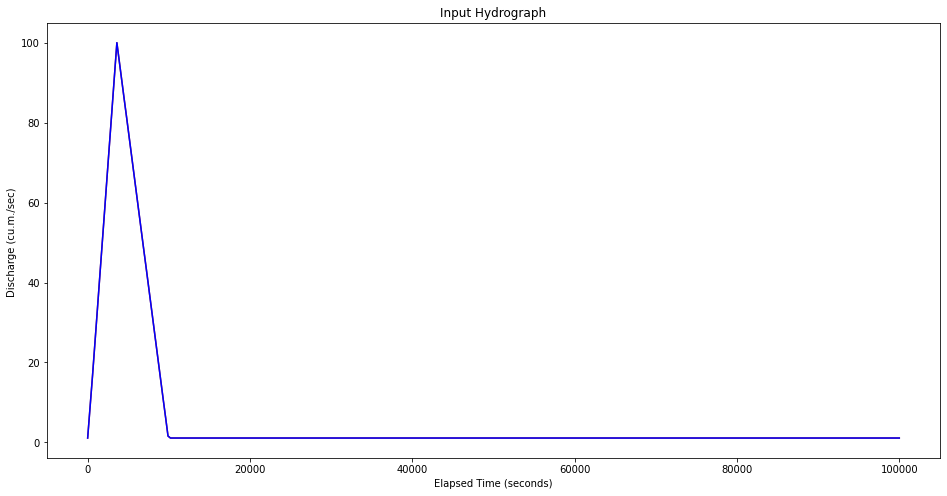

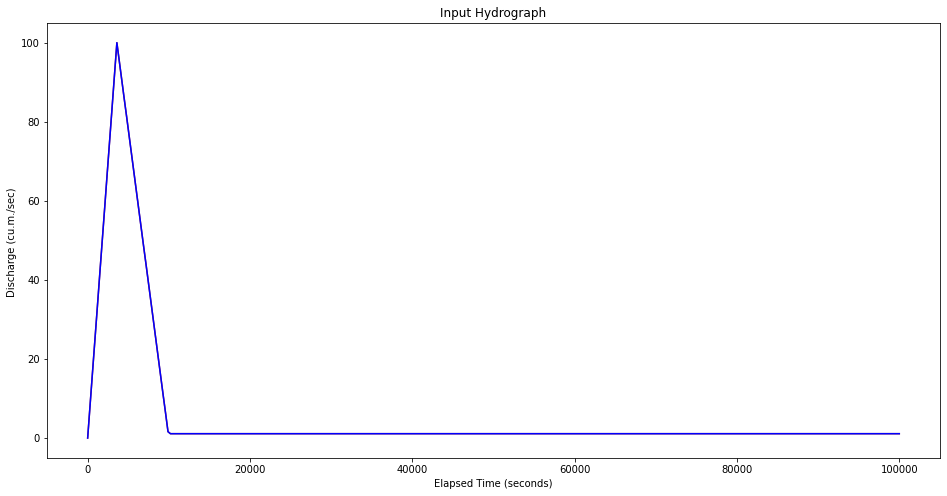